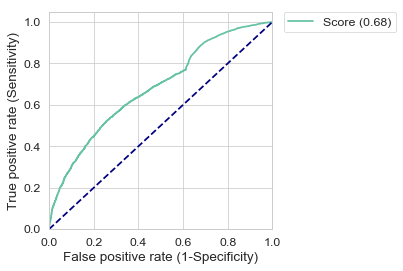

SpearmanrResult(correlation=0.5388515733226185, pvalue=2.3750350418632384e-240)

In [2]:
import pandas as pd
import sys

sys.path.append('/home/bikash/Documents/Solubility/For_upload/Solubility/')

import functions

#Datasets
pET = pd.read_pickle('/home/bikash/Documents/Solubility/For_upload/Solubility/results/pET_complete.pkl.gz', compression='infer')
ecoli_w3110 = pd.read_pickle('/home/bikash/Documents/Solubility/For_upload/Solubility/results/ecoli.pkl.gz', compression='infer')
pET['Accession'] = pET['Accession'].apply(lambda x:x.split('_')[0])

protein_sol_pET21 = pd.read_csv('pET21_NESG_protein-sol.txt', sep='\t', header=None)
protein_sol_pET15 = pd.read_csv('protein-sol_pET15_NESG.txt', sep='\t', header=None)
protein_sol_ecoli = pd.read_csv('protein-sol_ecoli_W3110_tags.txt', sep='\t', header=None)

#merge pET
protein_sol_pET = pd.concat([protein_sol_pET15, protein_sol_pET21])


#Rename cols
protein_sol_pET = protein_sol_pET.rename(columns={0:'Accession', 1:'Score'})
protein_sol_ecoli = protein_sol_ecoli.rename(columns={0:'JW', 1:'Score'})

protein_sol_pET.shape, pET.shape, ecoli_w3110.shape, protein_sol_ecoli.shape

#merge results with cleaned dataset
df_pET = pET.merge(protein_sol_pET, on="Accession")
df_ecoli = ecoli_w3110.merge(protein_sol_ecoli, on="JW")


#ROC for pET

df = df_pET[['Score']].copy()

labels = df_pET['Solubility'].values
functions.make_roc(df, labels)

#Correlation for ecoli
from scipy.stats import spearmanr

spearmanr(df_ecoli['Score'], df_ecoli['Solubility(%)'])

In [19]:
df_pET.shape, df_ecoli.shape

((12216, 7), (3198, 6))